<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#folium" data-toc-modified-id="folium-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>folium</a></span><ul class="toc-item"><li><span><a href="#Marker" data-toc-modified-id="Marker-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Marker</a></span></li><li><span><a href="#save(html)" data-toc-modified-id="save(html)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>save(html)</a></span></li><li><span><a href="#Circle,-CircleMarker" data-toc-modified-id="Circle,-CircleMarker-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Circle, CircleMarker</a></span></li><li><span><a href="#LatLngPopup" data-toc-modified-id="LatLngPopup-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>LatLngPopup</a></span></li><li><span><a href="#ClickForMarker" data-toc-modified-id="ClickForMarker-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>ClickForMarker</a></span></li><li><span><a href="#PolyLine" data-toc-modified-id="PolyLine-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>PolyLine</a></span></li></ul></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matplotlib</a></span><ul class="toc-item"><li><span><a href="#State-Machine" data-toc-modified-id="State-Machine-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>State Machine</a></span></li><li><span><a href="#한글화" data-toc-modified-id="한글화-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>한글화</a></span></li><li><span><a href="#그래프-세부설정" data-toc-modified-id="그래프-세부설정-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>그래프 세부설정</a></span></li></ul></li><li><span><a href="#vincent" data-toc-modified-id="vincent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>vincent</a></span></li><li><span><a href="#json" data-toc-modified-id="json-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>json</a></span><ul class="toc-item"><li><span><a href="#vincent와-folium-연동" data-toc-modified-id="vincent와-folium-연동-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>vincent와 folium 연동</a></span></li><li><span><a href="#pandas에서-json-사용" data-toc-modified-id="pandas에서-json-사용-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>pandas에서 json 사용</a></span></li></ul></li><li><span><a href="#서울-지도" data-toc-modified-id="서울-지도-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>서울 지도</a></span></li><li><span><a href="#단계구분도-(Choropleth)" data-toc-modified-id="단계구분도-(Choropleth)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>단계구분도 (Choropleth)</a></span></li></ul></div>

## folium

공공데이터 출처 : 
- incheon : https://www.data.go.kr/data/3034800/fileData.do  
- shop : https://www.data.go.kr/data/3034800/fileData.do

파일이름을 변환하여 사용하였다.

In [130]:
import pandas as pd

In [2]:
shop = pd.read_csv('shop.csv', encoding='cp949')

In [3]:
incheon = pd.read_csv('incheon.csv', encoding='cp949')

In [4]:
# 데이터가 많으므로 실습을 위해서 일부만 사용
incheon_small = incheon.iloc[:100, :].copy()

In [5]:
incheon_small

,순번,분전함,등주,위도,경도,데이터기준일자
0,1,월미로21(YB1),좌103,37.472676,126.606904,2020-04-27
1,2,월미로21(YB1),좌104,37.473054,126.606874,2020-04-27
2,3,월미로21(YB1),좌105,37.473430,126.606698,2020-04-27
3,4,월미로21(YB1),좌106,37.473816,126.606510,2020-04-27
4,5,월미로21(YB1),좌107,37.474174,126.606356,2020-04-27
...,...,...,...,...,...,...
95,96,개항로3(YB10),우36,37.472398,126.634052,2020-04-27
96,97,개항로3(YB10),우34,37.472202,126.633423,2020-04-27
97,98,개항로3(YB10),우32,37.472095,126.632803,2020-04-27
98,99,개항로3(YB10),우30,37.472006,126.632138,2020-04-27


In [6]:
import folium

In [7]:
# 인천을 시작 좌표로 설정
m = folium.Map([37.4644673,126.6342654], zoom_start=14)

In [8]:
m

### Marker

In [9]:
# naemdtuple은 attribute 방식으로 접근할 수 있는 특징이 있어서 편하다.
for i in incheon_small.itertuples(): 
    folium.Marker([i.위도, i.경도], popup=i.등주, tooltip=i.분전함).add_to(m) # popup = 누를 때 Action
                                                                            # tooltip = 마우스 오버했을 때 Action

In [10]:
# 한글 이슈가 있음, 기본 설정이 latin1이기 때문에 깨진 것 처럼 보인다.
m

html 태그로 텍스트 스타일 바꿀 수 있다.

In [83]:
m = folium.Map([37.4644673,126.6342654], zoom_start=14) 

In [84]:
for i in incheon_small.itertuples(): 
    folium.Marker([i.위도, i.경도], popup=i.등주, tooltip='<b>test</b>').add_to(m)

In [85]:
m

### save(html)

손쉽게 html로 저장할 수 있다.

In [11]:
m.save('incheon.html')

### Circle, CircleMarker

지도 위에 원을 그려준다.

In [86]:
incheon_small = incheon.iloc[:10, :].copy()

In [95]:
m = folium.Map([37.4644673,126.6342654], zoom_start=12) 

In [96]:
folium.Circle(['37.481697', "126.510237"], 100).add_to(m)       # 상대적 크기 -> 확대축소에 따라 원의 크기는 그대로이다.
folium.CircleMarker(['37.491867', '126.569308'], 100).add_to(m) # 절대적 크기 -> 확대축소하면 원의 크기가 바뀐다.

In [97]:
m

In [98]:
m = folium.Map([37.4644673,126.6342654], zoom_start=12) 

옵션으로 색도 바꿀 수 있다. 

In [101]:
for i in incheon_small.itertuples():
    folium.CircleMarker([i.위도, i.경도], tooltip="<b>test</b>", color="red").add_to(m)

In [102]:
m

### LatLngPopup

마우스를 클릭하면 해당 위치의 좌표를 알려준다.

In [110]:
m = folium.Map([37.4644673,126.6342654], zoom_start=12) 

In [105]:
folium.LatLngPopup().add_to(m)

In [107]:
m

### ClickForMarker

마우스를 클릭하면 해당 위치의 좌표를 알려준다.

In [115]:
m = folium.Map([37.4644673,126.6342654], zoom_start=12) 

In [118]:
folium.ClickForMarker(popup="ClickPoint").add_to(m)

In [119]:
m

### PolyLine

좌표마다 연결하는 선을 그어서 다각형을 만든다.

In [147]:
m = folium.Map( location=[37.5665, 126.9780], zoom_start=13)

In [148]:
shop_small = shop["좌표(경위도)_wgs84"].str.split('|')[:5].copy()

In [149]:
# for문으로 먼저 만들어본다.
temp = []
for i in shop_small[0]:
    temp.append([float(i.split(',')[1]), float(i.split(',')[0])])

In [152]:
# for문이 잘 되면 comprehension 방법으로 바꾼다.
temp2 = [[float(i.split(',')[1]), float(i.split(',')[0])] for i in shop_small[0]]

In [150]:
folium.PolyLine(temp, fill=True, color="red").add_to(m)

In [151]:
m

반복문으로 shop_small을 모두 그려본다.

In [ ]:
m = folium.Map( location=[37.5665, 126.9780], zoom_start=13)

In [162]:
# Series를 for문에 넣을 수 있다. 
for i in shop_small:
    folium.PolyLine([[float(j.split(',')[1]), float(j.split(',')[0])] for j in i]).add_to(m)

In [163]:
m

## Matplotlib

In [131]:
import matplotlib.pyplot as plt

### State Machine

**MATLAB -> State-Machine**  
변수를 지정하지 않아도 가까이 있는 변수를 가져와서 사용한다. 

State-Machine의 예시
```
a = 1
+ 3
# 변수를 지정하지 않아도 덧셈이 실행되어 a는 4가 된다. 
```

matplotlib의 가장 베이스는 figure이다.

In [132]:
plt.figure(figsize=(10,5));

<Figure size 720x360 with 0 Axes>

셀 내에서는 할당을 안해도 상태가 공유된다.  

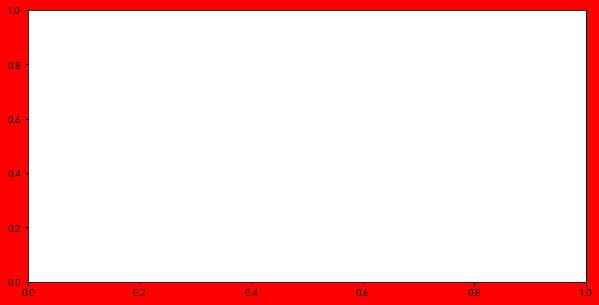

In [133]:
plt.figure(figsize=(10,5), facecolor='red')
plt.axes() # 아무런 인자도 없지만 1번 라인의 세팅을 공유함

`figure`는 생략 가능하다.

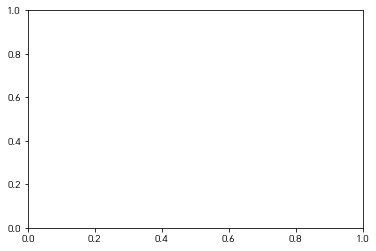

In [134]:
plt.axes() # axes만 해도 내부적으로 figure가 실행된다.

한 셀 내에서는 상태가 공유되므로, 그래프가 겹쳐진다.

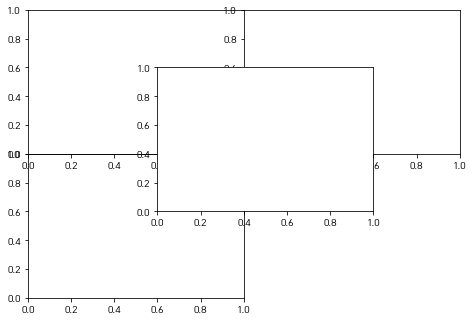

In [135]:
# plt.figure(figsize=(10, 5), facecolor='red')
plt.axes([0,0,0.5,0.5])
plt.axes([0,0.5,0.5,0.5])
plt.axes([0.5,0.5,0.5,0.5])
plt.axes([0.3,0.3,0.5,0.5])

셀이 다르면 상태를 공유하지 않는다.

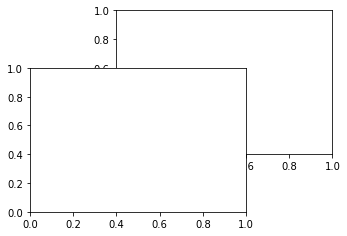

In [2]:
# 위 셀과 상태를 공유하지 않기 때문에 2개만 그려진다.
plt.axes([0.5,0.5,0.5,0.5])
plt.axes([0.3,0.3,0.5,0.5])

`plot`은 데이터를 가지고 그래프를 그린다.

matplotlib은 기본적으로 다음과 같이 figure, axes, plot 을 기본구조로 한다. 

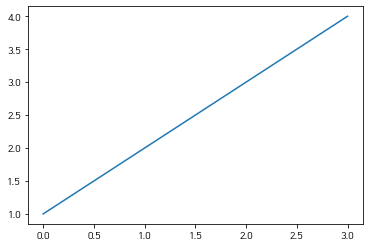

In [136]:
# 각 단계마다 지정할 수 있는 옵션이 있다. 
plt.figure()
plt.axes()
plt.plot([1,2,3,4])

`figure`와 `axes`를 생략해도 알아서 실행해준다.

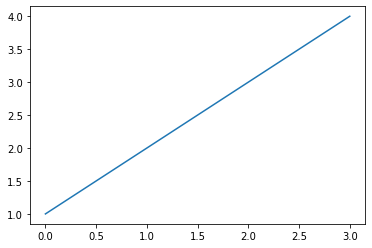

In [3]:
# 생략하면 기본값 사용한다.
plt.plot([1,2,3,4])

`title`은 그래프에 제목을 설정한다.  
state machine 방법이므로, 그래프를 지정하지 않아도 알아서 제목이 생성된다.

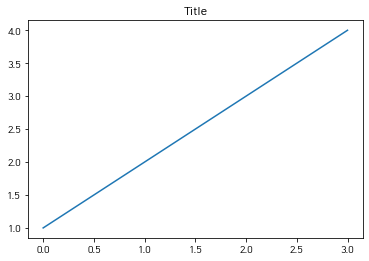

In [137]:
plt.title('Title')
plt.plot([1,2,3,4])

그래프 모양은 그대로이다.  
순서가 바뀌면 out이 달라진다. 즉, 맨 마지막 라인이 out으로 출력된다.  

Text(0.5, 1.0, 'Title')

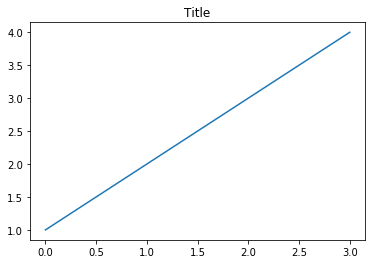

In [4]:
plt.plot([1,2,3,4])
plt.title('Title')

기본 설정이 한글 지원이 안되서 한글 제목을 사용하면 문자가 깨진다.

C:\Users\JINHYO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JINHYO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JINHYO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\JINHYO\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0, flags=flags)


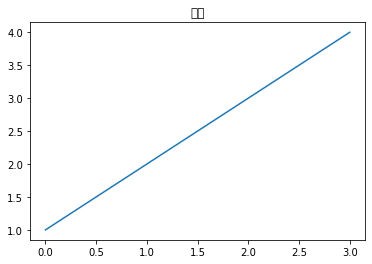

In [5]:
plt.title('한글')
plt.plot([1,2,3,4])

### 한글화

In [6]:
import matplotlib as mp

In [7]:
fm = mp.font_manager.FontManager()

사용가능한 폰트 목록에서 한글 지원하는 폰트를 찾는다.

In [8]:
# 사용가능한 폰트 목록
fm.ttflist

[<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>,
 <Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>,
 <Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>,
 <Font 'cmex10' (cmex10.ttf) normal normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>,
 <Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>,
 <Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Obl

PC마다 설치된 폰트가 다르기 때문에 한글 지원이 되는 폰트는 직접 찾아야 한다.  
폰트가 반드시 한글을 지원하는 폰트여야 한다.

In [9]:
# 한글 지원하는 폰트명으로 재할당
plt.rcParams['font.family'] = 'HCR Dotum'

한글이 정상적으로 출력된다.

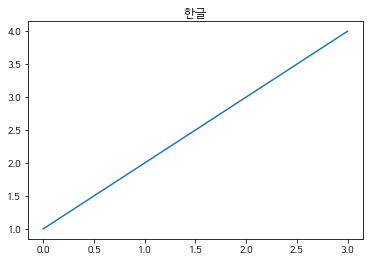

In [10]:
plt.title('한글')
plt.plot([1,2,3,4])

### 그래프 세부설정

matplotlib은 사용자가 세세하게 하나씩 세팅해야한다.

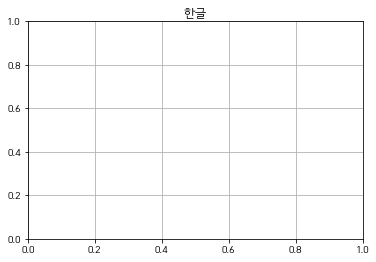

In [11]:
# grid는 격자무늬를 표시한다.
plt.title('한글')
plt.grid()

Text(0.5, 0, 'x라벨')

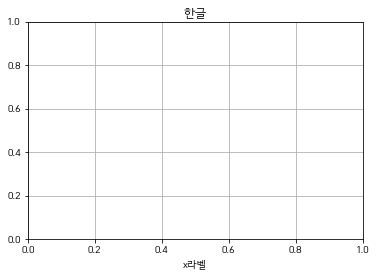

In [12]:
# xlable은 x축에 라벨을 붙인다.
plt.title('한글')
plt.grid()
plt.xlabel('x라벨')

Text(0, 0.5, 'y라벨')

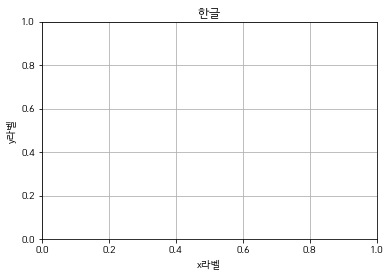

In [13]:
# ylable은 y축에 라벨을 붙인다.
plt.title('한글')
plt.grid()
plt.xlabel('x라벨')
plt.ylabel('y라벨')

([<matplotlib.axis.XTick at 0x1dc807a2dd8>,
 <a list of 3 Text xticklabel objects>)

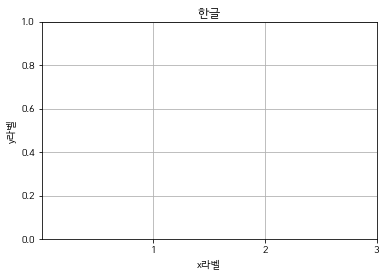

In [14]:
# xticks는 x축 눈금을 설정한다.
plt.title('한글')
plt.grid()
plt.xlabel('x라벨')
plt.ylabel('y라벨')
plt.xticks([1,2,3])

In [ ]:
# Error
plt.title('한글')
plt.grid()
plt.xlabel('x라벨')
plt.ylabel('y라벨')
plt.xticks([1,2,3])
plt.yticks(['마', '바'])

([<matplotlib.axis.YTick at 0x1dc80d5d6d8>,
 <a list of 3 Text yticklabel objects>)

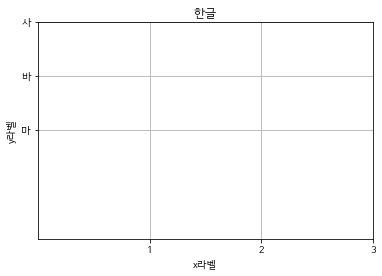

In [17]:
# 눈금을 문자로 표현하는 방법
# xticks, yticks는 첫번째 인자로 숫자를 넣는다. labels은 두번째 인자.
plt.title('한글')
plt.grid()
plt.xlabel('x라벨')
plt.ylabel('y라벨')
plt.xticks([1,2,3])
plt.yticks(ticks=[2, 3, 4], labels=['마', '바', '사'])

(0.2, 0.6)

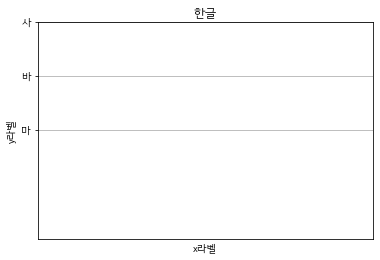

In [18]:
# xlim은 x축에서 그래프를 보여줄 만큼 자른다.
plt.title('한글')
plt.grid()
plt.xlabel('x라벨')
plt.ylabel('y라벨')
plt.xticks([1,2,3])
plt.yticks(ticks=[2, 3, 4], labels=['마', '바', '사'])
plt.xlim(0.2, .6)

더 많은 설정 방법은 공식문서를 참고하세요  
[matplotlib 공식문서](https://matplotlib.org/contents.html?v=20200514180805)

## vincent

vincent 설치는 다음 명령어로 할 수 있다.  
pandas가 함께 설치되는 것으로 보아, pandas와 연동됨을 알 수 있다.

In [19]:
!pip install vincent

In [138]:
import vincent

In [139]:
dir(vincent) # 처음보면 dir

['Area',
 'Axis',
 'AxisProperties',
 'Bar',
 'Chart',
 'Data',
 'DataRef',
 'GroupedBar',
 'Line',
 'Map',
 'Mark',
 'MarkProperties',
 'MarkRef',
 'Pie',
 'PropertySet',
 'Scale',
 'Scatter',
 'StackedArea',
 'StackedBar',
 'Transform',
 'ValueRef',
 'Visualization',
 'Word',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_compat',
 'axes',
 'charts',
 'colors',
 'core',
 'data',
 'initialize_notebook',
 'legends',
 'marks',
 'properties',
 'scales',
 'transforms',
 'values',
 'visualization']

In [140]:
# 처음에 그래프가 안보인다.
vincent.Bar([1,2,3])

In [141]:
# initialize_notebook 해야 그래프가 보인다. 
vincent.initialize_notebook()

In [142]:
# 객체 지향 방식을 쓸 수 있다.
bar = vincent.Bar([1,2,3])

In [ ]:
# Error
bar.axis_titles('연습')

In [143]:
# 인자 2개 있어야 한다.
bar.axis_titles('연습', '연습2')

In [28]:
# json 형태로 그래프를 출력할 수 있다. 
bar.to_json('x.json')

In [29]:
import seaborn as sns

C:\Users\JINHYO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
tips = sns.load_dataset('tips')

In [147]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [148]:
# vincent는 pandas Series를 바로 넣을 수 있다.
bar = vincent.Bar(tips.tip)

In [149]:
bar

In [150]:
# DataFrame도 된다.
# fancy indexing -> DataFrame
bar = vincent.Bar(tips[['tip']])

In [151]:
bar

In [152]:
# DataFrame에 column이 여러개 있어도 구분해서 그려준다.
bar = vincent.Bar(tips[['tip', 'total_bill']])

In [153]:
bar

In [154]:
d = vincent.Data.from_pandas(tips)

In [155]:
# pandas의 각 index, column에 해당하는 값을 dictionary로 만든다.
d.values

[{'idx': 0, 'col': 'total_bill', 'val': 16.99},
 {'idx': 0, 'col': 'tip', 'val': 1.01},
 {'idx': 0, 'col': 'sex', 'val': 'Female'},
 {'idx': 0, 'col': 'smoker', 'val': 'No'},
 {'idx': 0, 'col': 'day', 'val': 'Sun'},
 {'idx': 0, 'col': 'time', 'val': 'Dinner'},
 {'idx': 0, 'col': 'size', 'val': 2},
 {'idx': 1, 'col': 'total_bill', 'val': 10.34},
 {'idx': 1, 'col': 'tip', 'val': 1.66},
 {'idx': 1, 'col': 'sex', 'val': 'Male'},
 {'idx': 1, 'col': 'smoker', 'val': 'No'},
 {'idx': 1, 'col': 'day', 'val': 'Sun'},
 {'idx': 1, 'col': 'time', 'val': 'Dinner'},
 {'idx': 1, 'col': 'size', 'val': 3},
 {'idx': 2, 'col': 'total_bill', 'val': 21.01},
 {'idx': 2, 'col': 'tip', 'val': 3.5},
 {'idx': 2, 'col': 'sex', 'val': 'Male'},
 {'idx': 2, 'col': 'smoker', 'val': 'No'},
 {'idx': 2, 'col': 'day', 'val': 'Sun'},
 {'idx': 2, 'col': 'time', 'val': 'Dinner'},
 {'idx': 2, 'col': 'size', 'val': 3},
 {'idx': 3, 'col': 'total_bill', 'val': 23.68},
 {'idx': 3, 'col': 'tip', 'val': 3.31},
 {'idx': 3, 'col': '

## json

javascript에서 데이터를 교환하기 위한 포맷. dictionary와 거의 90% 일치한다.

In [46]:
with open('x.json') as f:
    data = f.read()

In [47]:
# open은 모든 파일을 문자열로 읽어온다.
data

'{\n  "axes": [\n    {\n      "scale": "x",\n      "title": "\\uc5f0\\uc2b5",\n      "type": "x"\n    },\n    {\n      "scale": "y",\n      "title": "\\uc5f0\\uc2b52",\n      "type": "y"\n    }\n  ],\n  "data": [\n    {\n      "name": "table",\n      "values": [\n        {\n          "col": "data",\n          "idx": 0,\n          "val": 1\n        },\n        {\n          "col": "data",\n          "idx": 1,\n          "val": 2\n        },\n        {\n          "col": "data",\n          "idx": 2,\n          "val": 3\n        }\n      ]\n    },\n    {\n      "name": "stats",\n      "source": "table",\n      "transform": [\n        {\n          "keys": [\n            "data.idx"\n          ],\n          "type": "facet"\n        },\n        {\n          "type": "stats",\n          "value": "data.val"\n        }\n      ]\n    }\n  ],\n  "height": 500,\n  "legends": [],\n  "marks": [\n    {\n      "from": {\n        "data": "table",\n        "transform": [\n          {\n            "keys": [\

In [43]:
import json

In [48]:
with open('x.json') as f:
    data = json.load(f)

In [49]:
# json 라이브러리를 이용하면 dictinoary처럼 사용할 수 있다.
data

{'axes': [{'scale': 'x', 'title': '연습', 'type': 'x'},
  {'scale': 'y', 'title': '연습2', 'type': 'y'}],
 'data': [{'name': 'table',
   'values': [{'col': 'data', 'idx': 0, 'val': 1},
    {'col': 'data', 'idx': 1, 'val': 2},
    {'col': 'data', 'idx': 2, 'val': 3}]},
  {'name': 'stats',
   'source': 'table',
   'transform': [{'keys': ['data.idx'], 'type': 'facet'},
    {'type': 'stats', 'value': 'data.val'}]}],
 'height': 500,
 'legends': [],
 'marks': [{'from': {'data': 'table',
    'transform': [{'keys': ['data.col'], 'type': 'facet'},
     {'height': 'data.val', 'point': 'data.idx', 'type': 'stack'}]},
   'marks': [{'properties': {'enter': {'fill': {'field': 'data.col',
        'scale': 'color'},
       'width': {'band': True, 'offset': -1, 'scale': 'x'},
       'x': {'field': 'data.idx', 'scale': 'x'},
       'y': {'field': 'y', 'scale': 'y'},
       'y2': {'field': 'y2', 'scale': 'y'}}},
     'type': 'rect'}],
   'type': 'group'}],
 'padding': 'auto',
 'scales': [{'domain': {'data': 

In [50]:
# dictionary 방식으로 값에 접근할 수 있다.
data['axes']

[{'scale': 'x', 'title': '연습', 'type': 'x'},
 {'scale': 'y', 'title': '연습2', 'type': 'y'}]

### vincent와 folium 연동

json을 이용해서 popup에 그래프가 출력되도록 할 수 있다.

In [172]:
m = folium.Map([37.4568565, 126.7029735], zoom_start=14)

In [173]:
v = folium.Vega(data, width='90', height='90') # data는 vincent 그래프를 로드한 json

In [174]:
p = folium.Popup(max_width='300px').add_child(v) # popup에 추가할 때는 add_child

In [175]:
folium.Marker([37.4568565, 126.7029735], popup=p).add_to(m) # 지도에 추가할 때는 add_to

In [176]:
# marker를 클릭하면 그래프가 출력된다.
m

json은  dictionary처럼 쓸 수 있으므로, 값 업데이트할 수 있다.

In [177]:
data['width'] = 200
data['height'] = 200

In [178]:
m = folium.Map([37.4568565, 126.7029735], zoom_start=14)

In [179]:
v = folium.Vega(data, width='90', height='90')

In [180]:
p = folium.Popup(max_width='300px').add_child(v)

In [181]:
folium.Marker([37.4568565, 126.7029735], popup=p).add_to(m)

In [182]:
# popup 그래프가 작아졌다.
m

### pandas에서 json 사용

In [86]:
import pandas as pd

In [189]:
df = pd.DataFrame([['a', 'b'], ['c', 'd']],
                  index=['row 1', 'row 2'],
                  columns=['col 1', 'col 2'])

In [190]:
df

,col 1,col 2
row 1,a,b
row 2,c,d


In [191]:
# to_json은 pandas 객체를 json 포맷으로 저장한다.
df.to_json("df.json")

In [195]:
# open은 항상 문자열로 읽어온다.
with open('df.json') as fp:
    df_json = fp.read()

In [194]:
# dict가 아니라 str이다.
df_json

'{"col 1":{"row 1":"a","row 2":"c"},"col 2":{"row 1":"b","row 2":"d"}}'

In [192]:
# read_json은 json 파일을 읽어들여서 DataFrame을 만든다.
pd.read_json('df.json')

,col 1,col 2
row 1,a,b
row 2,c,d


In [196]:
data = json.loads(df_json)

In [198]:
data

{'col 1': {'row 1': 'a', 'row 2': 'c'}, 'col 2': {'row 1': 'b', 'row 2': 'd'}}

In [202]:
# json도 pandas로 불러 와서 별 거 다 할 수 있다.
pd.json_normalize(data)

,col 1.row 1,col 1.row 2,col 2.row 1,col 2.row 2
0,a,c,b,d


## 서울 지도

자료는 LMS 수업게시판 5월 13일에 업로드되어 있습니다. (Geo Data.zip)

- geo json은 래스터 방식
- topo json은 벡터 방식

In [203]:
with open('Geo Data/asset/seoul_municipalities_geo_simple.json', encoding='utf8') as f:
    geo_data = json.load(f)

In [204]:
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [205]:
m = folium.Map([37.5665, 126.9780])

In [206]:
# 지도 안에 추가할 때는 add_to
# popup 안에 추가할 때는 add_child
folium.GeoJson(geo_data).add_to(m)

In [207]:
# 서울시 행정구역 구분을 나타낼 수 있다.
m

## 단계구분도 (Choropleth)

In [99]:
from pprint import pprint # pretty print의 약자

In [100]:
# pprint는 구조 파악할 때 좋다.
pprint(geo_data)

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
                                              37.557533180704915],
                                             [127.11879551821994,
                                              37.557222485451305],
                                             [127.12146867175024,
                                              37.55986003393365],
                                             [127.12435254630417,
                                              37.56144246249796],
                                             [127.13593925898998,
                                              37.56564793048277],
                                             [127.14930548011061,
                                              37.56892250303897],
                                             [127.15511020940411,
                                              37.57093642128295],
                                             [127.16683184366129,
        

                                             [126.93844070234584,
                                              37.4893532861132],
                                             [126.94373156012337,
                                              37.48938843727846],
                                             [126.94922661389508,
                                              37.49125437495649],
                                             [126.95396955055433,
                                              37.48955250290043],
                                             [126.9559655046206,
                                              37.48820165625994],
                                             [126.95881175306481,
                                              37.48874989165474],
                                             [126.96329694970828,
                                              37.4905835370787],
                                             [126.96291787066104,
             

                                             [126.79539987549317,
                                              37.57451148875729],
                                             [126.79523455851671,
                                              37.57760277954844],
                                             [126.7958606942207,
                                              37.58019957877273],
                                             [126.79799133400897,
                                              37.58036436587069],
                                             [126.80091228188235,
                                              37.5854309825683],
                                             [126.80289369340177,
                                              37.58621464221784],
                                             [126.80131704756816,
                                              37.58839794302751],
                                             [126.80149834313248,
            

                                             [126.9281697003186,
                                              37.584376616028365],
                                             [126.92596484570709,
                                              37.58441659356971],
                                             [126.92444169370404,
                                              37.581233899739914],
                                             [126.91792000144513,
                                              37.58034997804668],
                                             [126.91827498278953,
                                              37.58276881451649],
                                             [126.91464724464083,
                                              37.583228529985455],
                                             [126.90522065831053,
                                              37.57409700522574],
                                             [126.90373193212757,
        

                                             [126.9959894573757,
                                              37.67754299691771],
                                             [127.00000021675876,
                                              37.68100582640454],
                                             [127.00566931208934,
                                              37.68228507374621],
                                             [127.01039666042071,
                                              37.681894589603594]]],
                            'type': 'Polygon'},
               'properties': {'base_year': '2013',
                              'code': '11090',
                              'name': '강북구',
                              'name_eng': 'Gangbuk-gu'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[126.977175406416,
                                              37.62859715400388],
                                             [126.9794090

                                              37.514736123015844],
                                             [126.95249990298159,
                                              37.51722500741813],
                                             [126.95003825019774,
                                              37.520781022055274],
                                             [126.9488066464266,
                                              37.52424913252661],
                                             [126.94566733083212,
                                              37.526617542453366],
                                             [126.94717864071288,
                                              37.53213495568077],
                                             [126.95340780191557,
                                              37.533494726370755],
                                             [126.95926437828754,
                                              37.53897908363236],
       

In [101]:
# 구 정보만 뽑기
geo_data['features'][1]['properties']['name']

'송파구'

In [209]:
len(geo_data["features"])

25

In [210]:
# 모든 구 이름 가져오기
temp = []
for i in range(25):
    temp.append(geo_data['features'][i]['properties']['name'])

In [211]:
pd_data = pd.DataFrame(temp)

In [212]:
pd_data.rename({0:'구'}, axis=1, inplace=True)

In [213]:
pd_data

,구
0,강동구
1,송파구
2,강남구
3,서초구
4,관악구
5,동작구
6,영등포구
7,금천구
8,구로구
9,강서구


In [115]:
import numpy as np

In [116]:
np.random.randint(0, 100)

13

In [214]:
# random으로 임의의 값을 채운다.
pd_data['환자수'] = 0
pd_data['환자수'] = pd_data['환자수'].map(lambda x: np.random.randint(0, 100))

In [215]:
pd_data

,구,환자수
0,강동구,12
1,송파구,57
2,강남구,29
3,서초구,56
4,관악구,46
5,동작구,19
6,영등포구,45
7,금천구,12
8,구로구,97
9,강서구,8


In [216]:
m = folium.Map([37.5665, 126.9780])

In [217]:
# 구마다의 환자수를 색농도로 표현한다.
folium.Choropleth(geo_data=geo_data, 
                  data=pd_data, 
                  columns=['구', '환자수'], 
                  fill_color='YlGn',
                  key_on='feature.properties.name').add_to(m)

In [218]:
m